In [ ]:
if (!requireNamespace("BiocManager", quietly = FALSE))
    install.packages("BiocManager")

BiocManager::install("trackViewer")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'BiocVersion', 'trackViewer'

also installing the dependencies ‘formatR’, ‘checkmate’, ‘lambda.r’, ‘futile.options’, ‘bit’, ‘Formula’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘bit64’, ‘plogr’, ‘BiocFileCache’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Hmisc’, ‘dichromat’, ‘VariantAnnotation’, ‘png’, ‘jpeg’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘SummarizedExperiment’, ‘Biostrings’, ‘BiocParallel’, ‘RSQLite’, ‘biomaRt’, ‘Biobase’, ‘ensembldb’, ‘BSgenome’, ‘biovizBase’, ‘latticeExtra’, ‘matrixStats’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘XML’, ‘GenomicRanges’, ‘GenomeInfoDb’, ‘GenomicAlignments’, ‘GenomicFeatures’, ‘Gviz’, ‘Rsamtools’, ‘S4Vectors’, ‘rtracklayer’, ‘BiocGenerics’, ‘IRanges’, ‘AnnotationDbi’, ‘grImport’, ‘plotrix’, ‘Rgraphviz’, ‘InteractionSet’, ‘graph’




In [ ]:
library(Gviz)
library(rtracklayer)
library(trackViewer)
library(readxl)

ERROR: ignored

In [ ]:
my_data <- read_excel("LDLR_variants_of_interest_60k.xlsx", sheet=2)
head(my_data)

ERROR: ignored

In [ ]:
my_data2 <- readxl::read_excel("annotation_dependencies_LDLR_exon_stat_ends_aa_coords_test.xlsx", sheet=2)
head(my_data2, 15)

chr,cds,start,end,status,windows
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
19,aa,25,65,LDL-receptor class A 1,40
19,aa,66,106,LDL-receptor class A 2,40
19,aa,107,145,LDL-receptor class A 3,38
19,aa,146,186,LDL-receptor class A 4,40
19,aa,195,233,LDL-receptor class A 5,38
19,aa,234,272,LDL-receptor class A 6,38
19,aa,274,313,LDL-receptor class A 7,39
19,aa,314,353,EGF-like 1,39
19,aa,354,393,EGF-like 2; calcium-binding,39


In [ ]:
my_data1 <- read_excel("annotation_dependencies_LDLR_exon_stat_ends_aa_coords_test.xlsx", sheet=1)
head(my_data1, 20)

chr,cds,start,end,status,windows
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
19,CDS,1,23,exon1,22
19,CDS,24,64,exon2,40
19,CDS,65,105,exon3,40
19,CDS,106,232,exon4,126
19,CDS,233,273,exon5,40
19,CDS,274,314,exon6,40
19,CDS,315,354,exon7,39
19,CDS,355,396,exon8,41
19,CDS,397,454,exon9,57


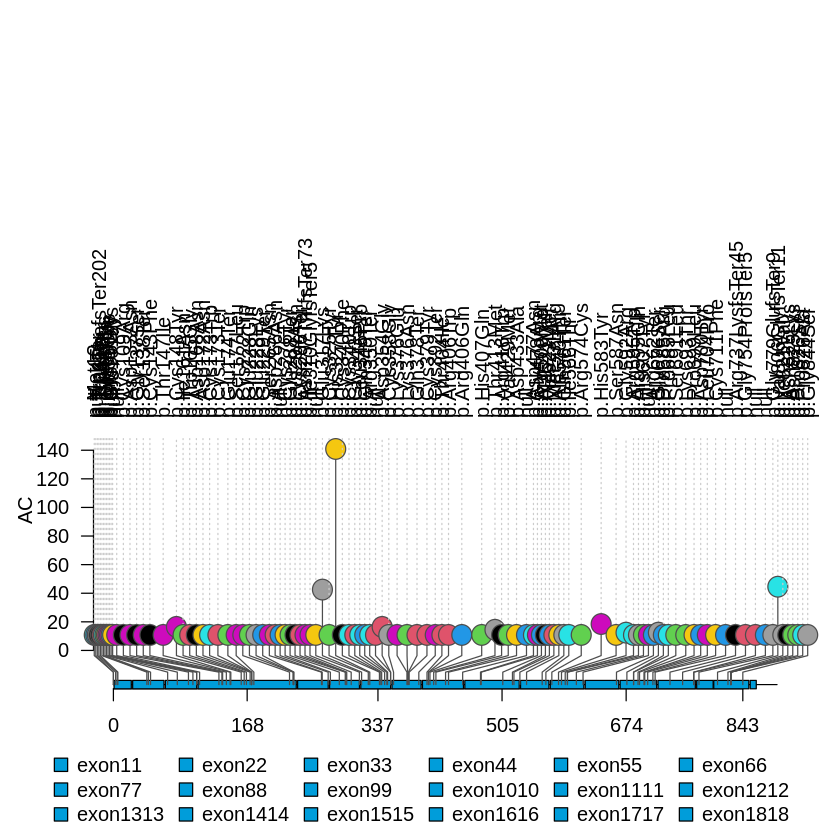

In [ ]:
SNP = (my_data$aa_length)

fifth = max(my_data$aa_length)/5

Variants <- GRanges("chr1", IRanges(SNP, width=1, 
        names=paste0(my_data$hgvsp_canonical)))
Variants$color <- sample.int(60, length(SNP), replace=TRUE)
Variants$border <- sample(c("gray30"), length(SNP), replace=TRUE)
xaxis <- c(min(my_data$aa_length), floor(fifth*1), floor(fifth*2), 
        floor(fifth*3), floor(fifth*4), max(my_data$aa_length))

Variants$score <- my_data$AC

features1 <- GRanges("chr1", IRanges((my_data1$start), 
                                    width=(my_data1$windows),
                                    names=paste0(my_data1$status,
                                     1:length(my_data1$windows))
                                    ))

features1$fill <- c("#009DDA")#, "grey")                       
# features1$fill <- sample.int(10000000, 18, replace=TRUE)
# features$fill <- c(10,20,30,40,50,60,70,80,90,100)

# features.mul$height[1:2] <- list(unit(1/8, "inches"),
#                                  unit(1/9, "inches"))

# features.mul$fill <- c("#91091e", "#da723c", "#94b5c0", 
#                        "#b34180", "#e36bae", "#f8a1d1",
#                        "#ff9292", "#ffb4b4", "#aee1e1", 
#                        "#ff5e78", "#009DDA", "gray",
#                        "#009DDA", "gray", "#009DDA", 
#                        "gray", "#009DDA", "gray",
#                        "#009DDA", "gray")

features1$featureLayerID <- 
    paste("Exon")
# names(features1) <- 
#     paste(features1$featureLayerID, 
#           rep(1:length(features), 2), sep="_")


lolliplot(Variants, features1, ylab="AC", ranges = GRanges("chr1",
    IRanges(min(my_data$aa_length), max(my_data$aa_length)+50)), xaxis=xaxis,
    rescale = TRUE)


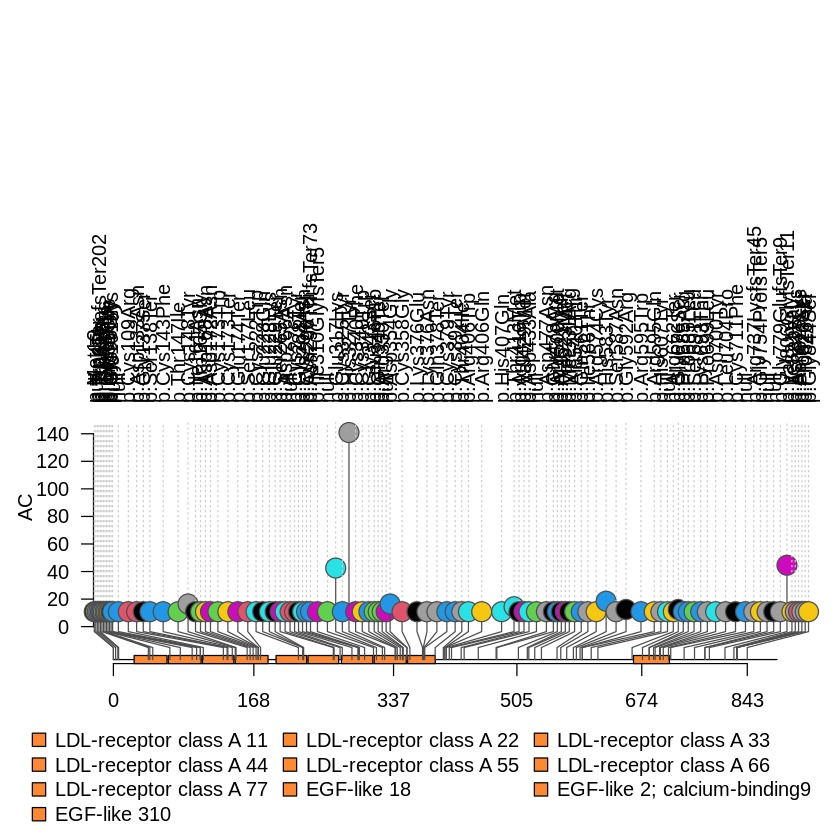

In [ ]:
SNP = (my_data$aa_length)

fifth = max(my_data$aa_length)/5

Variants <- GRanges("chr1", IRanges(SNP, width=1 ))#,names=paste0(my_data$hgvsp_canonical)
Variants$color <- sample.int(60, length(SNP), replace=TRUE)
Variants$border <- sample(c("gray30"), length(SNP), replace=TRUE)
xaxis <- c(min(my_data$aa_length), floor(fifth*1), floor(fifth*2), 
        floor(fifth*3), floor(fifth*4), max(my_data$aa_length))

Variants$score <- my_data$AC

features2 <- GRanges("chr1", IRanges((my_data2$start), 
                                    width=(my_data2$windows),
                                    names=paste0(my_data2$status,
                                     1:length(my_data2$windows))
                                    ))

features2$fill <- c("#FF8833")#, "grey")                       
# features1$fill <- sample.int(10000000, 18, replace=TRUE)
# features$fill <- c(10,20,30,40,50,60,70,80,90,100)

# features.mul$height[1:2] <- list(unit(1/8, "inches"),
#                                  unit(1/9, "inches"))

# features.mul$fill <- c("#91091e", "#da723c", "#94b5c0", 
#                        "#b34180", "#e36bae", "#f8a1d1",
#                        "#ff9292", "#ffb4b4", "#aee1e1", 
#                        "#ff5e78", "#009DDA", "gray",
#                        "#009DDA", "gray", "#009DDA", 
#                        "gray", "#009DDA", "gray",
#                        "#009DDA", "gray")

features2$featureLayerID <- 
    paste("LDLR-Test_Case")
# names(features2) <- 
#     paste(features2$featureLayerID, 
#           rep(1:length(features), 2), sep="_")


lolliplot(Variants, features2, ylab="AC", ranges = GRanges("chr1",
    IRanges(min(my_data$aa_length), max(my_data$aa_length)+50)), xaxis=xaxis,
    rescale = TRUE)

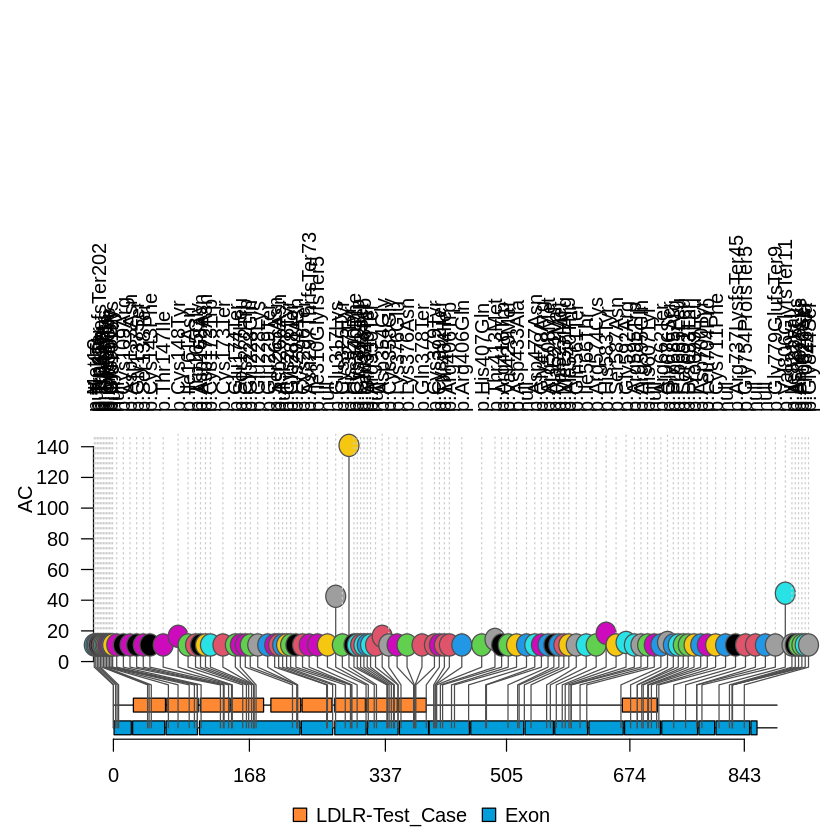

In [ ]:
comb_features = c(features2, features1)

comb_features$height <- list(unit(1/8, "inches"))

# names(comb_features) <- comb_features$featureLayerID
names(comb_features) <- comb_features$featureLayerID

lolliplot(Variants, comb_features, ylab="AC", ranges = GRanges("chr1",
    IRanges(min(my_data$aa_length), max(my_data$aa_length)+50)), xaxis=xaxis,
    rescale = TRUE)